# TP2: Sac de Mots, TF-IDF, Distance Cosine

**M1 Informatique - Introduction au Traitement Automatique des Langues**

L'objectif de ce TP est d'étudier la représentation d'un document sous la forme d'un *sac de mots* (*Bag Of Word - BOW*) avec un modèle vectoriel. Nous verrons deux types de pondération : la **pondération par la fréquence normalisée des termes** (*Term Frequency - TF*) et celles par la **fréquence inverse dans les documents** (*Inverse Document Frequency - IDF*). Enfin nous utiliserons ces représentations sur une tâche de classification thématique de documents grâce à la similarité Cosine entre les vecteurs pondérés de documents.

## 1 Représentation vectorielle en Sac de Mots

### 1.1 Tableau document/terme

Soit un ensemble de documents textuels D = d₁, d₂, ..., dₙ, la **représentation vectorielle** de type **sac de mots** consiste à traduire la collection de documents en un tableau de données attributs-valeurs, où chaque document est une ligne du tableau, et chaque mot une colonne. Par exemple, soit un ensemble de 4 documents contenant des suites de mots, représentés par le code identifiant de chaque mot, sur un lexique de 10 mots.

| D | t₁ | t₂ | t₃ | t₄ | t₅ | t₆ | t₇ | t₈ | t₉ | t₁₀ |
|---|---|---|---|---|---|---|---|---|---|-----|
| d₁ | w₁,₁ | w₁,₂ | w₁,₃ | w₁,₄ | w₁,₅ | w₁,₆ | w₁,₇ | w₁,₈ | w₁,₉ | w₁,₁₀ |
| d₂ | w₂,₁ | w₂,₂ | w₂,₃ | w₂,₄ | w₂,₅ | w₂,₆ | w₂,₇ | w₂,₈ | w₂,₉ | w₂,₁₀ |
| d₃ | w₃,₁ | w₃,₂ | w₃,₃ | w₃,₄ | w₃,₅ | w₃,₆ | w₃,₇ | w₃,₈ | w₃,₉ | w₃,₁₀ |
| d₄ | w₄,₁ | w₄,₂ | w₄,₃ | w₄,₄ | w₄,₅ | w₄,₆ | w₄,₇ | w₄,₈ | w₄,₉ | w₄,₁₀ |

Comme on peut le voir, **chaque document est représenté par un vecteur** (une ligne de la matrice), la taille du vecteur correspondant au lexique choisi pour filtrer l'ensemble des documents de la collection. Le choix du lexique est donc crucial : plus le lexique est grand, meilleure sera la couverture lexicale du modèle vis à vis de chaque document, mais cela entraîne une taille de vecteur importante, avec de nombreuses valeurs à zéro, et étant donné la loi de Zipf, de nombreux mots sont présents dans tous les documents et donc ne sont pas discriminants pour caractériser un thème. En général il faut trouver un compromis entre la couverture du lexique (la meilleure possible) et la taille des vecteurs (les plus petits possibles).

### 1.2 Pondération

Chaque case $w_{i,j}$ peut contenir différentes valeurs appelées *pondérations* des mots des documents. Voici trois exemples de pondération simple, pour un ensemble de N documents sur un lexique de V mots :

- pondération booléenne : $w_{i,j}$ = 1 si le mot t_j est présent dans le document $d_i$, sinon la valeur est 0.
- pondération par fréquence : $w_{i,j}$ = C(i, j) où C(i, j) est le nombre de fois où le mot $t_j$ apparaît dans le document $d_i$.
- pondération par fréquence normalisée (TF - Term Frequency) :

$$w_{i,j} = tf(d_i, t_j) = \frac{C(i, j)}{\sum_{0<k<V} C(i, k)}$$

Le critère tf(i,j) va favoriser les termes très fréquents. Or, comme nous l'avons vu en étudiant la loi de Zipf, un terme présent dans presque tout le corpus (D) ne représente pas un événement significatif pour caractériser un document en particulier. A l'inverse un terme plus rare mais n'apparaissant que dans un petit nombre de document peut être beaucoup plus pertinent.

Le critère **IDF** pour *Inverse document frequency* permet de prendre en compte ce facteur.
Il se calcule de la manière suivante :

$$idf(t, D) = \log_{10}(\frac{N}{1 + n_t})$$

La quantité n_t représente le nombre de documents de D où le terme t est présent. On lui ajoute 1 pour éviter les valeurs nulles.

La quantité idf aura une valeur proche de 0 lorsqu'un mot est présent dans tous les documents (par exemple les mots outils tels que les articles ou les prépositions), et une valeur plus importante si le mot apparaît dans peu de documents.

Cette pondération idf s'utilise en combinaison avec la pondération tf, de la manière suivante :

$$w_{i,j} = tf\text{-}idf(d_i, t_j) = tf(d_i, t_j) \times idf(t_j, D)$$

## 2 Mesures de similarité

### 2.1 Similarité Cosine

Cette représentation vectorielle des documents permet de calculer facilement des mesures de similarité entre documents, en estimant des distances entre les vecteurs (les lignes de la matrice). Une des distances les plus utilisées utilise la mesure du Cosinus entre les vecteurs. L'idée de base est que plus l'angle est important entre deux vecteurs représentant les documents d₁ et d₂, plus le contenu de d₁ et d₂ est éloigné.

La figure ci-dessous illustre cette idée en présentant 3 vecteurs : 2 vecteurs de documents (d₁ et d₂) et 1 vecteur de requête (q). Si l'angle entre q et d₁ est plus faible qu'entre q et d₂, alors la requête q est plus proche du document d₁.

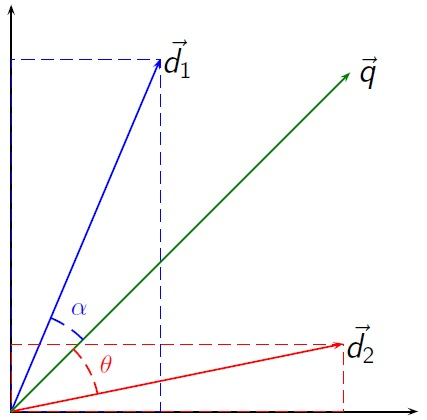

Similarité cosinus entre vecteurs

Pour calculer cet angle, on peut utiliser le produit scalaire des vecteurs de la manière suivante :

$$d_1 \cdot d_2 = ||d_1||||d_2||\cos(d_1, d_2) \Rightarrow \cos(d_1, d_2) = \frac{d_1 \cdot d_2}{||d_1||||d_2||}$$

avec :

$$||d_i|| = \sqrt{\sum_{0<k<V} (w_{i,k})^2}$$

et

$$d_1 \cdot d_2 = \sum_{0<k<V} w_{1,k} \times w_{2,k}$$

Pour déduire une distance dist(d₁, d₂) à partir de la similarité cosinus cos(d₁, d₂), il suffit de faire :

$$dist(d_1, d_2) = 1 - \cos(d_1, d_2) \text{ avec } 0 \leq dist(d_1, d_2) \leq 1$$

### 2.2 Utilisation : classification thématique

Calculer des distances entre des documents grâce à des mesures telles que dist permet, par exemple, de réaliser simplement des systèmes de classification thématique de documents.

Supposons que la collection de documents D soit partitionnée en K thèmes T₁, T₂, ..., Tₖ, par exemple : thèmes={politique, sport, justice, économie,...}.

Chaque thème Tᵢ est représenté par un ensemble de documents de D, appelé le corpus d'apprentissage Cᵢ du thème Tᵢ sur D.

On commence par faire l'union de tous les mots de D pour obtenir le lexique L qui représente l'espace lexical dans lequel chaque document sera projeté.

En construisant un vecteur de poids V sur cet espace L (avec une pondération booléenne, en fréquence tf ou avec le critère tfidf) pour chaque corpus Cᵢ, on obtient un modèle V(Cᵢ, L) représentant le vecteur de poids pour chaque thème Tᵢ dans l'espace L.

On peut ensuite réduire cet espace en sélectionnant uniquement les n mots ayant les pondérations les plus fortes (selon le critère choisi), afin de réduire la taille du modèle en ne gardant que les dimensions les plus représentatives, au sens de la pondération choisie. On obtient ainsi un espace lexical réduit Lⁿ et les vecteurs thématiques associés : V(Cᵢ, Lⁿ)

Lorsqu'on veut classer un nouveau document d entre les différents thèmes de D, il faut tout d'abord le projeter dans l'espace Lⁿ en calculant les pondérations des mots de d et en remplissant un vecteur V(d, Lⁿ) pour tous les mots de Lⁿ (les mots de Lⁿ ne se trouvant pas dans d ont des pondérations à 0), puis on trouve le modèle V(Cᵢ, Lⁿ) dont la distance avec V(d, Lⁿ) est minimale :

$$\hat{i} = \arg\min_i dist(V(d, L^n), V(C_i, L^n))$$

| Thème | t₁ | t₂ | t₃ | t₄ | t₅ | t₆ | t₇ | t₈ | t₉ | t₁₀ |
|--------|---|---|---|---|---|---|---|---|---|-----|
| Ctrain(Politique) | w₁,₁ | w₁,₂ | w₁,₃ | w₁,₄ | w₁,₅ | w₁,₆ | w₁,₇ | w₁,₈ | w₁,₉ | w₁,₁₀ |
| Ctrain(Sport) | w₂,₁ | w₂,₂ | w₂,₃ | w₂,₄ | w₂,₅ | w₂,₆ | w₂,₇ | w₂,₈ | w₂,₉ | w₂,₁₀ |
| Ctrain(Justice) | w₃,₁ | w₃,₂ | w₃,₃ | w₃,₄ | w₃,₅ | w₃,₆ | w₃,₇ | w₃,₈ | w₃,₉ | w₃,₁₀ |
| Ctrain(Economie) | w₄,₁ | w₄,₂ | w₄,₃ | w₄,₄ | w₄,₅ | w₄,₆ | w₄,₇ | w₄,₈ | w₄,₉ | w₄,₁₀ |
| document d | w₅,₁ | w₅,₂ | w₅,₃ | w₅,₄ | w₅,₅ | w₅,₆ | w₅,₇ | w₅,₈ | w₅,₉ | w₅,₁₀ |

## 3 Travail à faire

Dans ce TP vous allez manipuler les mêmes données (corpus_topic) provenant de dépêches de presse que dans le TP précédent. Vous pouvez utiliser vos programmes et les données tokenisées du TP précédent, vous pouvez aussi récupérer les données déjà tokenisées, avec 1 fichier train tokenisé pour chaque thème ici :
https://pageperso.lis-lab.fr/frederic.bechet/M1_TAL/TP2_data.tar.gz

Dans cette archive vous trouverez aussi le corpus de test au format JSON sous la forme d'une liste où chaque élément est un triplet contenant le nom du fichier source du document (filename), son label thématique (label), et le texte tokenisé sous forme de code (content).

Vous allez faire dans les exercices suivants des expériences en essayant différentes pondérations (booléenne, tf, tf-idf) et différentes tailles de lexique pour faire un système simple de classification thématique de document. Le but est de calculer, pour un nouveau document, une distance par rapport aux 4 modèles thématiques afin de déterminer le thème le plus proche.

### 3.1 Question 1 - vecteurs de poids booléen et fréquentiels

Écrire un programme qui prend en entrée les données d'apprentissage des 4 thèmes CLT, ECO, INT et SPO, et qui produit des vecteurs de poids, pour les pondérations booléenne et tf, pour chaque thème sur le lexique L contenant l'union des lexiques des corpus d'apprentissage. Affichez les 20 mots ayant les pondérations les plus fortes pour le poids tf pour chaque thème. Que constatez vous ?

In [28]:
# ...existing code...
import collections

themes = {
    "CLT": "train_CLT.tok",
    "ECO": "train_ECO.tok",
    "INT": "train_INT.tok",
    "SPO": "train_SPO.tok"
}

global_lexicon = set()
theme_freqs = {theme: collections.Counter() for theme in themes}
theme_word_sets = {theme: set() for theme in themes}

for theme, filepath in themes.items():
    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            # Skip the "0" token
            tokens = [token for token in line.strip().split() if token != "0"]
            theme_freqs[theme].update(tokens)
            global_lexicon.update(tokens)

bool_weights = {
    theme: {word: 1 for word in theme_freqs[theme]} for theme in themes
}
tf_weights = {
    theme: dict(theme_freqs[theme]) for theme in themes
}

# Afficher les 20 mots les plus fréquents par TF pour chaque thème
top_words = set()
for theme in themes:
    sorted_words = sorted(tf_weights[theme].items(), key=lambda x: x[1], reverse=True)[:20]
    print(f"Top 20 words for {theme} by TF:")
    for word, freq in sorted_words:
        print(f"  {word}: {freq}")
    print()
    top_words.update([w for w, _ in sorted_words])


Top 20 words for CLT by TF:
  1: 4255
  44: 2770
  3: 2158
  2: 1989
  5: 1082
  6: 1036
  8: 953
  4: 899
  15: 822
  10: 799
  9: 786
  11: 751
  14: 727
  12: 687
  16: 682
  26: 651
  17: 611
  18: 610
  13: 604
  19: 581

Top 20 words for ECO by TF:
  1: 4969
  3: 2455
  2: 2387
  44: 1683
  8: 1380
  5: 1356
  6: 1305
  9: 1207
  4: 1098
  10: 1074
  16: 951
  26: 950
  15: 932
  14: 821
  12: 798
  11: 737
  13: 731
  19: 615
  18: 565
  17: 565

Top 20 words for INT by TF:
  1: 4573
  3: 2606
  2: 2402
  44: 1750
  8: 1442
  5: 1377
  6: 1303
  9: 1278
  10: 1153
  4: 1140
  26: 1125
  11: 1054
  15: 1046
  16: 1024
  13: 964
  14: 754
  12: 697
  19: 678
  21: 656
  28: 627

Top 20 words for SPO by TF:
  3: 2064
  17: 1928
  18: 1925
  11: 1822
  1: 1621
  33: 778
  2: 652
  8: 402
  14: 393
  5: 352
  6: 326
  4: 295
  26: 274
  28: 265
  12: 244
  44: 222
  15: 200
  16: 198
  10: 189
  13: 169



*Réponse:* 

Les mêmes mots fréquents apparaissent dans tous les thèmes, ce qui limite leur capacité discriminante.  
Pour mieux différencier les thèmes, on peut utiliser TF-IDF, afin de réduire le poids des mots trop fréquents et donner plus d’importance à ceux qui sont rares mais informatifs.

### 3.2 Question 2 - pondérations tfidf

Vous allez maintenant calculer la pondération idf pour chaque mot de L en créant un nouveau vecteur de poids, puis vous allez combiner les poids tf et idf pour obtenir le vecteur de poids tfidf pour chaque thème. Affichez les 20 mots ayant les pondérations tfidf les plus fortes pour chaque thème. Que constatez vous ?

In [29]:
import math

# Calculer IDF
N = len(themes)
idfs = {}
for word in global_lexicon:
    num_themes_with_word = sum(word in tf_weights[t] for t in themes)
    idfs[word] = math.log10(N / (1 + num_themes_with_word))

# Calculer TF-IDF
tfidf_weights = {}
for theme in themes:
    tfidf_weights[theme] = {}
    for word, freq in tf_weights[theme].items():
        tfidf_weights[theme][word] = freq * idfs[word]

# Top 20 words by TF-IDF for each theme
top_tfidf_words = set()
for theme in themes:
    sorted_tfidf = sorted(tfidf_weights[theme].items(), key=lambda x: x[1], reverse=True)[:20]
    print(f"Top 20 words for {theme} by TF-IDF:")
    for word, score in sorted_tfidf:
        print(f"  {word}: {score:.4f}")
    print()
    top_tfidf_words.update([w for w, _ in sorted_tfidf])

# Construire la matrice uniquement pour l'union des 20 mots TF-IDF les plus importants
selected_tfidf_words = sorted(top_tfidf_words)

# Display which words are being used in the matrix
print("Selected top TF-IDF words (columns):")
for w in selected_tfidf_words:
    print(w, end=" ")
print()

print("Matrix (rows=themes, cols=selected top TF-IDF words):\n")

for theme in themes:
    row_vals = [tfidf_weights[theme].get(word, 0) for word in selected_tfidf_words]
    formatted_row_vals = [f"{val:.2f}" for val in row_vals]
    print(f"{theme}: {formatted_row_vals}")

Top 20 words for CLT by TF-IDF:
  2513: 15.0515
  4568: 12.9443
  4192: 10.2350
  14935: 9.9340
  2574: 9.6330
  10615: 8.7299
  6729: 8.4288
  693: 8.1210
  3612: 6.9237
  6128: 6.6227
  1796: 6.3719
  7081: 6.0206
  4253: 6.0206
  600: 6.0206
  21709: 5.1175
  3737: 4.8165
  5285: 4.5154
  1876: 4.5154
  5343: 4.5154
  10812: 3.9134

Top 20 words for ECO by TF-IDF:
  1456: 23.7814
  1882: 21.9752
  1499: 13.5463
  2850: 12.9443
  3717: 8.1278
  1587: 7.6213
  1382: 7.5257
  7000: 6.9237
  9401: 6.9237
  853: 6.8716
  4316: 6.3216
  17578: 5.7196
  3780: 4.8165
  1787: 4.8165
  8555: 4.5154
  5226: 4.5154
  13603: 4.3729
  3628: 4.2144
  2115: 4.2144
  4117: 4.2144

Top 20 words for INT by TF-IDF:
  3954: 23.1793
  3869: 16.2556
  7734: 12.3422
  2221: 10.2450
  4056: 9.3319
  7664: 8.7299
  5069: 8.1278
  4765: 8.1278
  8568: 7.5257
  3807: 6.6218
  2162: 6.6218
  7131: 6.0206
  4387: 5.6222
  14578: 5.4185
  2547: 5.3724
  39553: 4.8165
  3888: 4.7477
  5207: 4.6227
  3972: 4.6227
 

*Réponse:*

Les mots les mieux scorés par TF-IDF sont plus rares mais plus spécifiques à chaque thème, offrant un meilleur pouvoir discriminant que les mots uniquement basés sur leur fréquence.  

### 3.3 Question 3 - restriction du lexique

Vous allez maintenant écrire un programme permettant de réduire la taille du lexique L par rapport à une pondération donnée (par exemple tf) en choisissant un nombre maximal de mots n et en prenant les mots ayant les plus fortes valeurs de poids dans chaque thème. Il y a différentes manières de faire, comme par exemple de prendre les mots avec la pondération la plus forte à tour de rôle dans chaque thème, en évitant les doublons, jusqu'à atteindre la valeur n pour la taille du lexique obtenue. Expliquez la méthode et l'algorithme que vous aurez choisi pour cette étape. Afficher le lexique obtenu pour une valeur de n = 100 pour le critère tfidf.

In [30]:
n = 100

selected_lexicon = set()

sorted_tfidf_words = {theme: sorted(tfidf_weights[theme].items(), key=lambda x: x[1], reverse=True) for theme in themes}

while len(selected_lexicon) < n:
    for theme in themes:
        for word, score in sorted_tfidf_words[theme]:
            if word not in selected_lexicon:
                selected_lexicon.add(word)
                break
        if len(selected_lexicon) >= n:
            break

print(f"Selected lexicon (n={n}):")
for word in selected_lexicon:
    print(word)

Selected lexicon (n=100):
3103
4765
9401
39553
2115
77462
11002
1034
6729
1876
693
17578
1677
1796
1499
8907
2850
2547
3836
4316
7664
4056
8164
13575
5228
6501
3807
7060
4192
5226
8153
21709
6876
13603
3972
14935
10812
3022
14578
9203
1882
5069
790
2420
3612
7081
2574
4387
3628
2221
7000
8555
7131
12343
10615
1587
3954
1382
3737
15879
1711
4117
7586
3362
6128
17845
7373
4235
8529
3717
853
2917
5343
2357
3869
8389
3780
3888
600
8568
3208
2513
1787
13339
5734
5285
4253
2974
690
7428
1456
7734
1171
9207
11604
2717
4568
2162
352
5207


*Réponse:*

Méthode et Algorithme
Méthode choisie: Sélection itérative des mots avec les plus fortes pondérations TF-IDF, en évitant les doublons, jusqu'à atteindre ( n ) mots.

Algorithme:

Trier les mots de chaque thème par pondération TF-IDF décroissante.
Initialiser un ensemble vide pour stocker les mots sélectionnés.
Sélectionner itérativement les mots de chaque thème, en évitant les doublons.
Arrêter lorsque ( n ) mots uniques sont sélectionnés.

### 3.4 Question 4 - distance cosine

Écrivez le code qui permet de calculer une distance Cosine entre 2 vecteurs. Estimez et affichez les distances cosines entre les vecteurs de chaque thème du corpus pour les pondérations tf et tfidf. Qu'en déduisez vous ?

In [31]:
import numpy as np

# Function to calculate Cosine distance
def cosine_distance(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 1.0
    return 1 - (dot_product / (norm_vec1 * norm_vec2))

# Changez le en 100 pour voir les résultats, en utilise 3000 pour la prochaine question
n = 3000

selected_lexicon_tf = set()
selected_lexicon_tfidf = set()

sorted_tf_words = {theme: sorted(tf_weights[theme].items(), key=lambda x: x[1], reverse=True) for theme in themes}

sorted_tfidf_words = {theme: sorted(tfidf_weights[theme].items(), key=lambda x: x[1], reverse=True) for theme in themes}

while len(selected_lexicon_tf) < n:
    for theme in themes:
        for word, score in sorted_tf_words[theme]:
            if word not in selected_lexicon_tf:
                selected_lexicon_tf.add(word)
                break
        if len(selected_lexicon_tf) >= n:
            break

while len(selected_lexicon_tfidf) < n:
    for theme in themes:
        for word, score in sorted_tfidf_words[theme]:
            if word not in selected_lexicon_tfidf:
                selected_lexicon_tfidf.add(word)
                break
        if len(selected_lexicon_tfidf) >= n:
            break

selected_lexicon_tf = sorted(selected_lexicon_tf)
selected_lexicon_tfidf = sorted(selected_lexicon_tfidf)

# Matrice TF
tf_matrix = np.zeros((len(themes), len(selected_lexicon_tf)))
for i, theme in enumerate(themes):
    for j, word in enumerate(selected_lexicon_tf):
        tf_matrix[i, j] = tf_weights[theme].get(word, 0)

# Matrice TF-IDF
tfidf_matrix = np.zeros((len(themes), len(selected_lexicon_tfidf)))
for i, theme in enumerate(themes):
    for j, word in enumerate(selected_lexicon_tfidf):
        tfidf_matrix[i, j] = tfidf_weights[theme].get(word, 0)

# Display matrices

print("TF Matrix (rows=themes, cols=selected top TF words):")
print(selected_lexicon_tf)
for i, theme in enumerate(themes):
    formatted_row_vals = [f"{val:.2f}" for val in tf_matrix[i]]
    print(f"{theme}: {formatted_row_vals}")

print("\nTF-IDF Matrix (rows=themes, cols=selected top TF-IDF words):")
print(selected_lexicon_tfidf)
for i, theme in enumerate(themes):
    formatted_row_vals = [f"{val:.2f}" for val in tfidf_matrix[i]]
    print(f"{theme}: {formatted_row_vals}")

# Calculer les distances cosinus entre les thèmes
print("\nDistances cosinus pour les poids TF:")
for i, theme1 in enumerate(themes):
    for j, theme2 in enumerate(themes):
        if i < j:
            distance = cosine_distance(tf_matrix[i], tf_matrix[j])
            print(f"Distance entre {theme1} et {theme2}: {distance:.4f}")

print("\nDistances cosinus pour les poids TF-IDF:")
for i, theme1 in enumerate(themes):
    for j, theme2 in enumerate(themes):
        if i < j:
            distance = cosine_distance(tfidf_matrix[i], tfidf_matrix[j])
            print(f"Distance entre {theme1} et {theme2}: {distance:.4f}")

TF Matrix (rows=themes, cols=selected top TF words):
['1', '10', '100', '10000', '10004', '1001', '1004', '1005', '1006', '1008', '1009', '10096', '101', '1010', '1012', '10140', '10145', '10159', '1016', '1017', '10170', '1018', '10180', '1019', '10192', '1022', '10222', '1023', '1024', '1025', '10256', '10258', '1026', '10260', '1027', '103', '1030', '10307', '1031', '1032', '1033', '1034', '10342', '1035', '1036', '10383', '10386', '1041', '1042', '10425', '10429', '10430', '10441', '1045', '1046', '1047', '1048', '1049', '105', '10504', '1051', '1052', '1053', '1054', '10544', '10549', '1055', '10569', '1058', '10581', '106', '1060', '10610', '10615', '1062', '10642', '10651', '10655', '1066', '10664', '10665', '1067', '1069', '10694', '107', '1070', '10700', '1072', '1073', '1074', '1075', '10768', '10775', '108', '1080', '10801', '10806', '10812', '10816', '1083', '1084', '10860', '1089', '10890', '10892', '109', '1090', '10909', '1091', '10918', '1092', '1093', '10931', '1094', 

*Réponse:*

On remarque que les distances entre les vecteurs des thémes en utilisant la pondération Term Frequency sont assez faibles, surement pas assez pour un bon modèle. 
Les distances en utilisant tf-idf par contre sont maximales, avec la distance entre INT et SPO à 1, ce qui veut dire que les corpus des thèmes respectifs sont TOTALEMENT Différent (évidemment c'est une exagération car si on augmente la taille du lexique c-à-d les colonnes de la matrice on ne pourra pas avoir 1, mais un chiffre légerement inférieur).

### 3.5 Question 5 - évaluation

Effectuer une évaluation quantitative des performances de votre classifieur thématique sur les données de test des 4 thèmes CLT, ECO, INT et SPO. Déterminer l'influence de la taille du lexique et du choix du critère de pondération (booléen, tf ou idf) sur les performances. Effectuez une analyse des résultats et affichez des courbes taille du lexique / performance pour chaque critère de pondération.

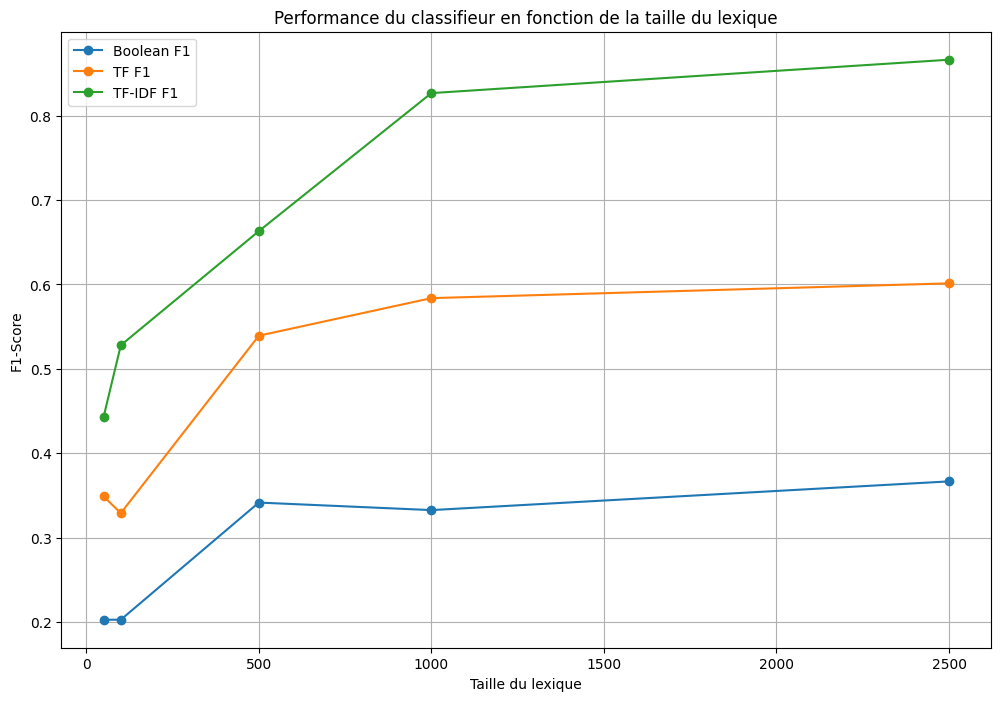

In [32]:
import json
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

with open('test_topic.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

# Les tailles de lexique à tester
n_values = [50, 100, 500, 1000, 2500]

performance_bool = {'precision': [], 'recall': [], 'f1': []}
performance_tf = {'precision': [], 'recall': [], 'f1': []}
performance_tfidf = {'precision': [], 'recall': [], 'f1': []}

# Iterer sur plusieurs tailles de lexique
for n in n_values:
    selected_lexicon_tf_n = selected_lexicon_tf[:n]
    selected_lexicon_tfidf_n = selected_lexicon_tfidf[:n]

    tf_matrix_n = np.zeros((len(themes), len(selected_lexicon_tf_n)))
    for i, theme in enumerate(themes):
        for j, word in enumerate(selected_lexicon_tf_n):
            tf_matrix_n[i, j] = tf_weights[theme].get(word, 0)

    tfidf_matrix_n = np.zeros((len(themes), len(selected_lexicon_tfidf_n)))
    for i, theme in enumerate(themes):
        for j, word in enumerate(selected_lexicon_tfidf_n):
            tfidf_matrix_n[i, j] = tfidf_weights[theme].get(word, 0)

    y_true = []
    y_pred_bool = []
    y_pred_tf = []
    y_pred_tfidf = []

    for doc in test_data:
        label = doc['label']
        content = doc['content'].split()
        y_true.append(label)

        # boolean vecteur
        bool_vector = np.array([1 if word in content else 0 for word in selected_lexicon_tf_n])

        # TF vecteur
        tf_vector = np.array([content.count(word) for word in selected_lexicon_tf_n])

        # TF-IDF vecteur
        tfidf_vector = np.array([content.count(word) * idfs.get(word, 0) for word in selected_lexicon_tfidf_n])

        bool_distances = [cosine_distance(bool_vector, tf_matrix_n[i]) for i in range(len(themes))]
        y_pred_bool.append(list(themes.keys())[np.argmin(bool_distances)])

        tf_distances = [cosine_distance(tf_vector, tf_matrix_n[i]) for i in range(len(themes))]
        y_pred_tf.append(list(themes.keys())[np.argmin(tf_distances)])

        tfidf_distances = [cosine_distance(tfidf_vector, tfidf_matrix_n[i]) for i in range(len(themes))]
        y_pred_tfidf.append(list(themes.keys())[np.argmin(tfidf_distances)])

    # Calculer les metriques de performance
    performance_bool['precision'].append(precision_score(y_true, y_pred_bool, average='macro', zero_division=0))
    performance_bool['recall'].append(recall_score(y_true, y_pred_bool, average='macro', zero_division=0))
    performance_bool['f1'].append(f1_score(y_true, y_pred_bool, average='macro', zero_division=0))

    performance_tf['precision'].append(precision_score(y_true, y_pred_tf, average='macro', zero_division=0))
    performance_tf['recall'].append(recall_score(y_true, y_pred_tf, average='macro', zero_division=0))
    performance_tf['f1'].append(f1_score(y_true, y_pred_tf, average='macro', zero_division=0))

    performance_tfidf['precision'].append(precision_score(y_true, y_pred_tfidf, average='macro', zero_division=0))
    performance_tfidf['recall'].append(recall_score(y_true, y_pred_tfidf, average='macro', zero_division=0))
    performance_tfidf['f1'].append(f1_score(y_true, y_pred_tfidf, average='macro', zero_division=0))

plt.figure(figsize=(12, 8))
plt.plot(n_values, performance_bool['f1'], label='Boolean F1', marker='o')
plt.plot(n_values, performance_tf['f1'], label='TF F1', marker='o')
plt.plot(n_values, performance_tfidf['f1'], label='TF-IDF F1', marker='o')
plt.xlabel('Taille du lexique')
plt.ylabel('F1-Score')
plt.title('Performance du classifieur en fonction de la taille du lexique')
plt.legend()
plt.grid(True)
plt.show()

Résultats sans surprise, pour n = 100, 200, 500, 1000, 2500
On pourrait s'apercevoir que le n optimal est ou est proche de 1000.